In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Wczytanie danych Iris
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Optymalna wartość k: 3


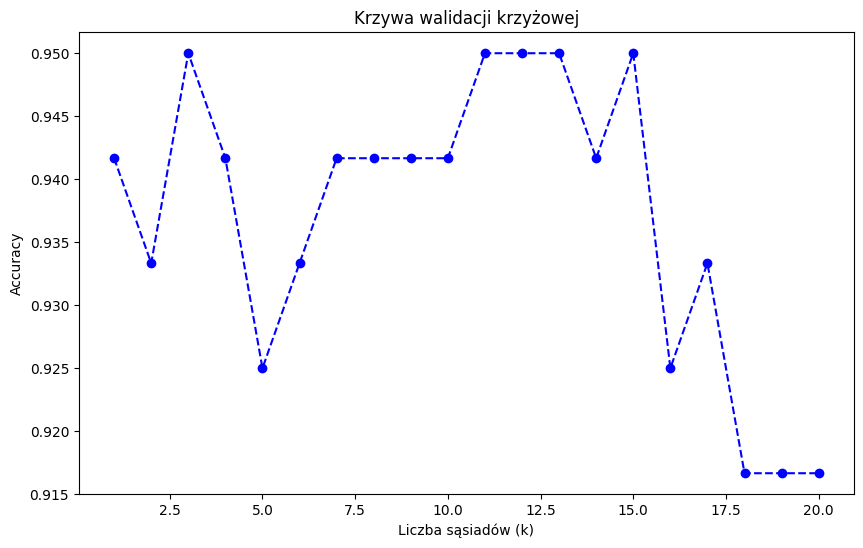

In [ ]:
# Lista do przechowywania wyników walidacji krzyżowej
cv_scores = []

# Test różnych wartości k
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Szukanie optymalnego k
optimal_k = np.argmax(cv_scores) + 1
print(f"Optymalna wartość k: {optimal_k}")

# Wykres krzywej walidacji
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), cv_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Accuracy')
plt.title('Krzywa walidacji krzyżowej')
plt.show()

In [ ]:
# KNN z najlepszym k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

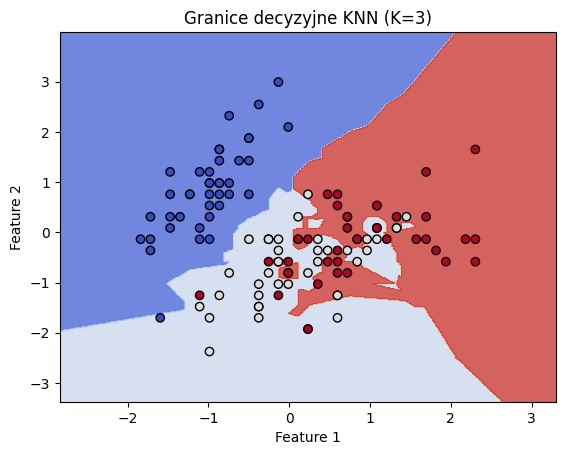

In [ ]:
# Wykres
def plot_decision_boundaries(X, y, model, title):
    h = .02  # Krok siatki

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Załóżmy, że chcemy zwizualizować granice decyzyjne dla pierwszych dwóch cech
X_subset = X_train_scaled[:, :2]
knn_optimal_subset = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal_subset.fit(X_subset, y_train)

plot_decision_boundaries(X_subset, y_train, knn_optimal_subset, 'Granice decyzyjne KNN (K={})'.format(optimal_k))